In [ ]:
import numpy as np
import os.path as osp
import matplotlib.pylab as plt
import sys
sys.path.insert(0, "/Users/kavimehta/cs284")

# from latent_3d_points.src.point_net_ae import PointNetAutoEncoder
# from latent_3d_points.src.autoencoder import Configuration as Conf
# from latent_3d_points.src.neural_net import MODEL_SAVER_ID

from latent_3d_points.src.in_out import snc_category_to_synth_id, create_dir, PointCloudDataSet, \
                                        load_all_point_clouds_under_folder, pickle_data, unpickle_data

from latent_3d_points.src.general_utils import plot_3d_point_cloud
# from latent_3d_points.src.tf_utils import reset_tf_graph

# from latent_3d_points.src.vanilla_gan import Vanilla_GAN
# from latent_3d_points.src.w_gan_gp import W_GAN_GP
# from latent_3d_points.src.generators_discriminators import latent_code_discriminator_two_layers,\
# latent_code_generator_two_layers

In [21]:
class_name = input('Give me the class name (e.g. "chair"): ').lower()

Give me the class name (e.g. "chair"): chair


In [41]:
top_in_dir = '../data/shape_net_core_uniform_samples_2048/'    

ae_configuration = '../data/single_class_ae/configuration'
syn_id = snc_category_to_synth_id()[class_name]
class_dir = osp.join(top_in_dir , syn_id)
all_pc_data = load_all_point_clouds_under_folder(class_dir, n_threads=8, file_ending='.ply', verbose=True)

6778 pclouds were loaded. They belong in 1 shape-classes.


In [14]:
from sklearn.cluster import KMeans

In [61]:
def gen_dataset(num_pcs):
    all_pc_data = load_all_point_clouds_under_folder(class_dir, n_threads=8, file_ending='.ply', verbose=True)
    batch = all_pc_data.next_batch(num_pcs)
    L = batch[0] # L is a list of chairs now
    print(L.shape)
    labels = batch[1]
    incomplete_set = []
    min_size = 2048
    max_size = 0
    for i in range(len(L)):
        if i%100 ==0:
            print(i)
        kmeans = KMeans(n_clusters=6).fit(L[i])
        incomplete = L[i][kmeans.labels_!=2]
        min_size = min(min_size, len(incomplete))
        max_size = max(max_size, len(incomplete))
        incomplete_set.append(incomplete)
    incomplete_set = np.array(incomplete_set)
    print("min_size: " + str(min_size))
    print("max_size: " + str(max_size))
    print(incomplete_set.shape)
    print(incomplete_set[0].shape)
    incomplete_pc_data = PointCloudDataSet(point_clouds=incomplete_set, labels=labels, init_shuffle=False)
    pickle_data('complete_data', L, labels)

In [62]:
gen_dataset(100)

6778 pclouds were loaded. They belong in 1 shape-classes.
(100, 2048, 3)
0
min_size: 1431
max_size: 1948
(100,)
(1691, 3)


IndexError: tuple index out of range

In [ ]:
unpickle_data('complete_data')

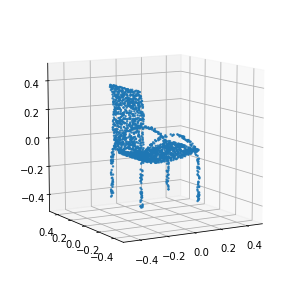

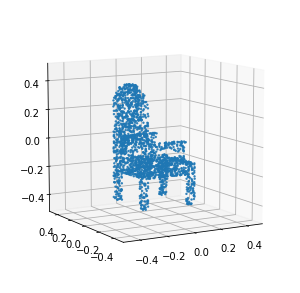

In [30]:
batch = all_pc_data.next_batch(21) # batch is a tuple of chair list, id list, None
L = batch[0] # L is a list of chairs now
labels = batch[1]
i = 0
plot_3d_point_cloud(L[i][:, 0], L[i][:, 1], L[i][:, 2], in_u_sphere=True);
i = 20
plot_3d_point_cloud(L[i][:, 0], L[i][:, 1], L[i][:, 2], in_u_sphere=True);

In [31]:
kmeans = KMeans(n_clusters=6).fit(L[0])
kmeans.labels_

array([2, 4, 1, ..., 3, 5, 5], dtype=int32)

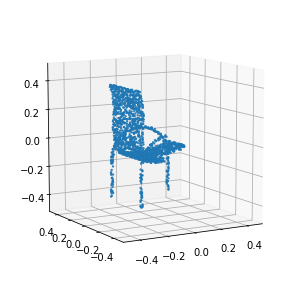

In [32]:
l1 = L[0][kmeans.labels_!=2]
plot_3d_point_cloud(l1[:, 0], l1[:, 1], l1[:, 2], in_u_sphere=True);

In [39]:
incomplete_pc_data = PointCloudDataSet(np.array((0,0,0)))

IndexError: tuple index out of range